In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
import statsmodels.api as sm
import datetime

In [3]:
bike_sharing = pd.read_csv("bikes_sharing.csv", header=0, sep=",")

In [4]:
bike_sharing.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


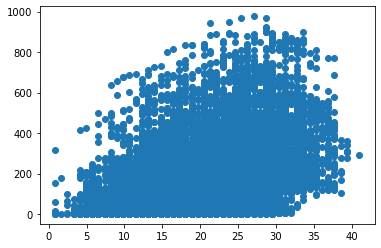

In [6]:
plt.scatter(x=bike_sharing["temp"], y=bike_sharing["count"])

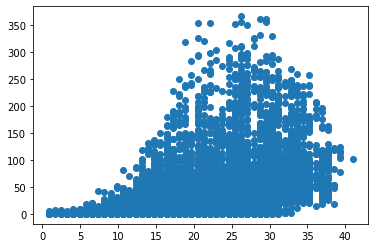

In [7]:
plt.scatter(x=bike_sharing["temp"], y=bike_sharing["casual"])

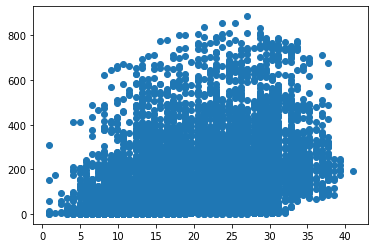

In [8]:
plt.scatter(x=bike_sharing["temp"], y=bike_sharing["registered"])

In [9]:
bike_sharing["datetime"] = pd.to_datetime(bike_sharing["datetime"])

In [10]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [12]:
bike_sharing["year"] = bike_sharing['datetime'].apply(lambda x: x.year)
bike_sharing["month"] = bike_sharing['datetime'].apply(lambda x: x.month)
bike_sharing["day"] = bike_sharing['datetime'].apply(lambda x: x.day)
bike_sharing["hour"] = bike_sharing['datetime'].apply(lambda x: x.hour)
bike_sharing["weekday"] = bike_sharing['datetime'].apply(lambda x: x.weekday())

In [19]:
bike_sharing.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [20]:
import seaborn as sns

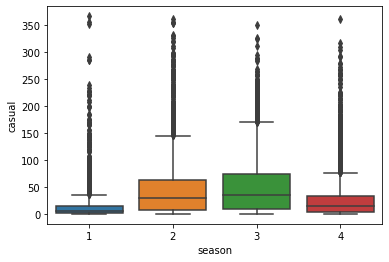

In [25]:
sns.boxplot(x="season", y="casual", data=bike_sharing);

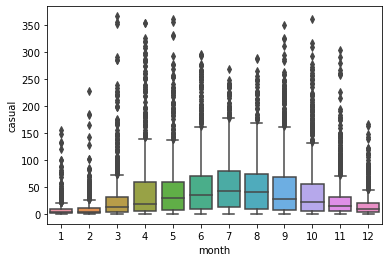

In [26]:
sns.boxplot(x="month", y="casual", data=bike_sharing);

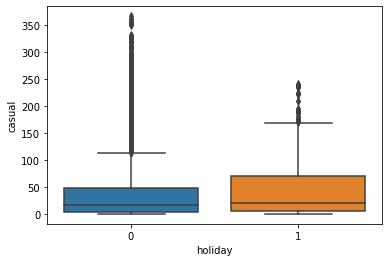

In [27]:
sns.boxplot(x="holiday", y="casual", data=bike_sharing);

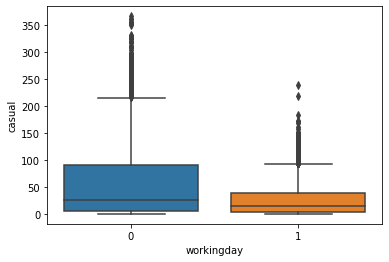

In [28]:
sns.boxplot(x="workingday", y="casual", data=bike_sharing);

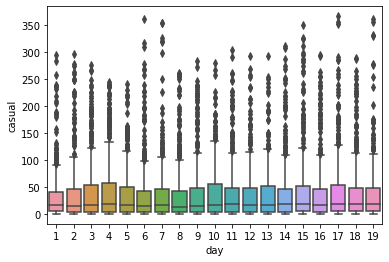

In [29]:
sns.boxplot(x="day", y="casual", data=bike_sharing);

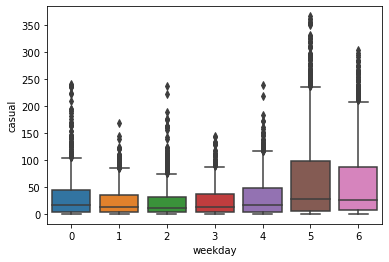

In [30]:
sns.boxplot(x="weekday", y="casual", data=bike_sharing);

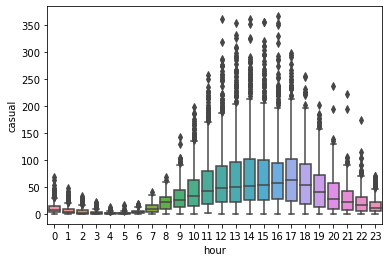

In [31]:
sns.boxplot(x="hour", y="casual", data=bike_sharing);

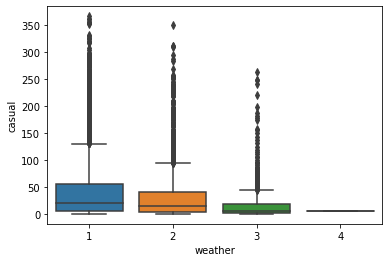

In [32]:
sns.boxplot(x="weather", y="casual", data=bike_sharing);

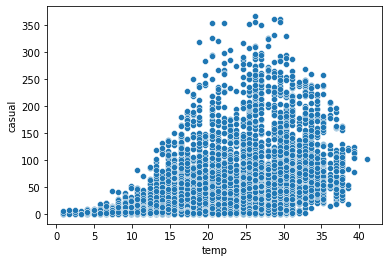

In [33]:
sns.scatterplot(x="temp", y="casual", data=bike_sharing);

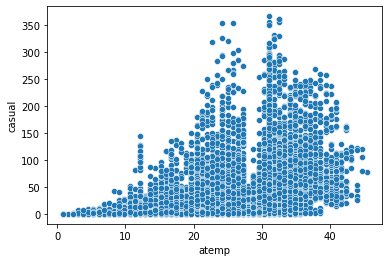

In [34]:
sns.scatterplot(x="atemp", y="casual", data=bike_sharing);

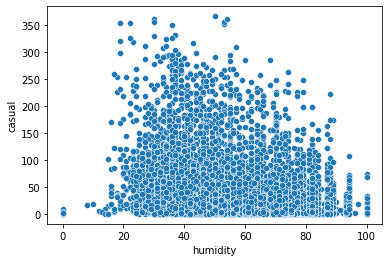

In [35]:
sns.scatterplot(x="humidity", y="casual", data=bike_sharing);

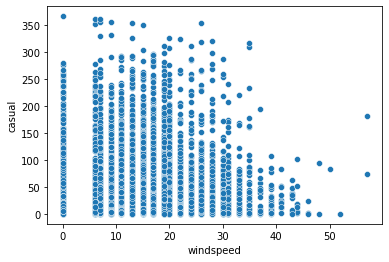

In [36]:
sns.scatterplot(x="windspeed", y="casual", data=bike_sharing);

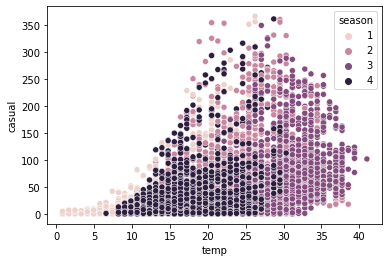

In [38]:
sns.scatterplot(x="temp", y="casual", hue="season", data=bike_sharing);

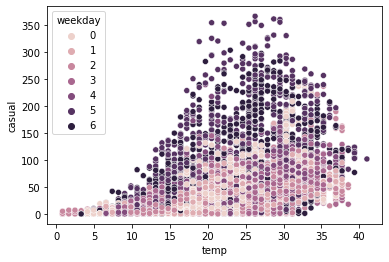

In [39]:
sns.scatterplot(x="temp", y="casual", hue="weekday", data=bike_sharing);

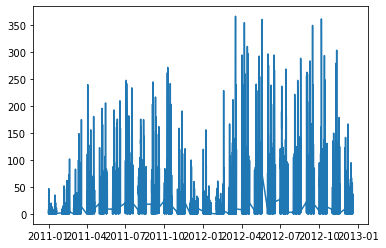

In [42]:
plt.plot(bike_sharing["datetime"], bike_sharing['casual']);

In [58]:
bikes_daily = bike_sharing.set_index('datetime').resample('D').agg({
    "count": "sum",
    "casual": "sum",
    "registered": "sum",
    "atemp": "mean",
    "temp": "mean",
    "season": "max",
    "workingday": "max",
    "weather": "max",
    "year": "max",
    "month": "max",
    "day": "max",
    "hour": "max",
    "weekday": "max",
    "windspeed":"mean",
    "humidity":"max",
})

In [50]:
bikes_daily

,count,casual,registered,atemp,temp,season,workingday,weather,year,month,day,hour,weekday
datetime,,,,,,,,,,,,,
2011-01-01,985,331,654,18.181250,14.110833,1.0,0.0,3.0,2011.0,1.0,1.0,23.0,5.0
2011-01-02,801,131,670,17.686957,14.902609,1.0,0.0,3.0,2011.0,1.0,2.0,23.0,6.0
2011-01-03,1349,120,1229,9.470227,8.050909,1.0,1.0,1.0,2011.0,1.0,3.0,23.0,0.0
2011-01-04,1562,108,1454,10.606087,8.200000,1.0,1.0,2.0,2011.0,1.0,4.0,23.0,1.0
2011-01-05,1600,82,1518,11.463478,9.305217,1.0,1.0,1.0,2011.0,1.0,5.0,23.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-15,5047,767,4280,16.919167,13.290833,4.0,0.0,2.0,2012.0,12.0,15.0,23.0,5.0
2012-12-16,3786,538,3248,18.496875,14.862500,4.0,0.0,3.0,2012.0,12.0,16.0,23.0,6.0
2012-12-17,4585,212,4373,20.075000,16.126667,4.0,1.0,3.0,2012.0,12.0,17.0,23.0,0.0


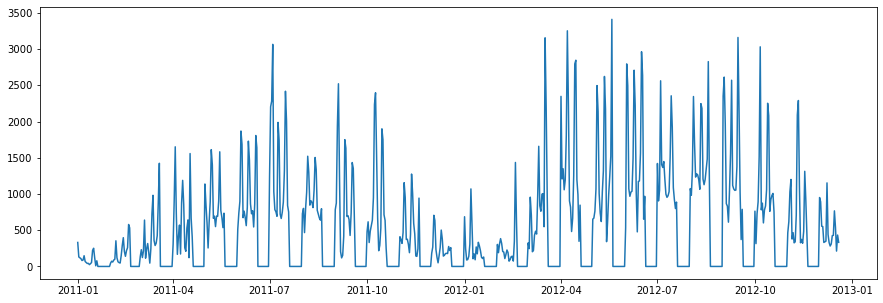

In [45]:
plt.figure(figsize=(15,5))
plt.plot(bikes_daily.index, bikes_daily["casual"]);

In [47]:
seasonality_analysis = bikes_daily.pivot_table(values="casual", index=bikes_daily.index.month, columns=bikes_daily.index.year)

In [49]:
seasonality_analysis

datetime,2011,2012
datetime,,
1,64.774194,169.161290
2,134.857143,190.379310
3,255.161290,553.096774
4,407.633333,919.466667
5,511.774194,820.000000
6,653.333333,965.800000
7,843.387097,800.064516
8,567.096774,912.580645
9,610.366667,919.666667


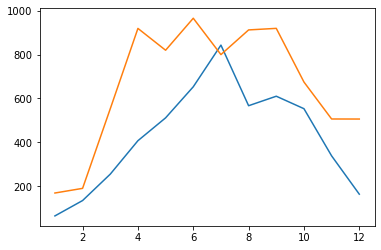

In [48]:
plt.plot(seasonality_analysis);

In [52]:
Y = bike_sharing["casual"]
X = bike_sharing["temp"]
X = sm.add_constant(X)

In [53]:
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     3037.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:37:15   Log-Likelihood:                -56684.
No. Observations:               10886   AIC:                         1.134e+05
Df Residuals:                   10884   BIC:                         1.134e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.5710      1.178    -20.855      0.000     -26.880     -22.262
temp           2.9951      0.054     55.112      0.000       2.889       3.102
==============================================================================
Omnibus:                     5847.505   Durbin-Watson:                   0.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47907.828
Skew:                           2.479   Prob(JB):                         0.00
Kurtosis:                      12.002   Cond. No.                         60.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# R-squared:	0.218
#   not very good. very close to 0. only explains 21%.
#   when people make a decision to rent a bike, only 21% is contributing to their decision

# const	-24.5710
#   this doesn't make sense. we can't rent -24 bikes
#   likely because we have a low R-squared

In [54]:
bikes_daily.head()

,count,casual,registered,atemp,temp,season,workingday,weather,year,month,day,hour,weekday
datetime,,,,,,,,,,,,,
2011-01-01,985,331,654,18.181250,14.110833,1.0,0.0,3.0,2011.0,1.0,1.0,23.0,5.0
2011-01-02,801,131,670,17.686957,14.902609,1.0,0.0,3.0,2011.0,1.0,2.0,23.0,6.0
2011-01-03,1349,120,1229,9.470227,8.050909,1.0,1.0,1.0,2011.0,1.0,3.0,23.0,0.0
2011-01-04,1562,108,1454,10.606087,8.200000,1.0,1.0,2.0,2011.0,1.0,4.0,23.0,1.0
2011-01-05,1600,82,1518,11.463478,9.305217,1.0,1.0,1.0,2011.0,1.0,5.0,23.0,2.0


In [55]:
Y = bikes_daily.dropna()["casual"]
X = bikes_daily.dropna()["temp"]
X = sm.add_constant(X)

In [56]:
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     194.4
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           4.94e-37
Time:                        13:42:24   Log-Likelihood:                -3551.9
No. Observations:                 456   AIC:                             7108.
Df Residuals:                     454   BIC:                             7116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -186.9751     79.933     -2.339      0.020    -344.060     -29.890
temp          51.8620      3.719     13.943      0.000      44.552      59.171
==============================================================================
Omnibus:                      137.566   Durbin-Watson:                   1.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              318.717
Skew:                           1.555   Prob(JB):                     6.19e-70
Kurtosis:                       5.664   Cond. No.                         62.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# R-squared is slightly better
# maybe daily overview is better for analysis

In [65]:
Y = bikes_daily.dropna()["casual"]
X = bikes_daily.dropna()[["temp", "humidity"]]
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     104.0
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           6.75e-38
Time:                        13:47:24   Log-Likelihood:                -3547.0
No. Observations:                 456   AIC:                             7100.
Df Residuals:                     453   BIC:                             7112.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        287.5760    170.903      1.683      0.093     -48.286     623.438
temp          53.8621      3.739     14.406      0.000      46.515      61.210
humidity      -6.3166      2.016     -3.133      0.002     -10.279      -2.355
==============================================================================
Omnibus:                      135.109   Durbin-Watson:                   1.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.933
Skew:                           1.538   Prob(JB):                     2.24e-67
Kurtosis:                       5.587   Cond. No.                         536.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
results = ols("casual ~ temp + humidity", data=bikes_daily).fit()

In [67]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     104.0
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           6.75e-38
Time:                        13:50:05   Log-Likelihood:                -3547.0
No. Observations:                 456   AIC:                             7100.
Df Residuals:                     453   BIC:                             7112.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    287.5760    170.903      1.683      0.0

In [69]:
results.predict(bike_sharing[['temp','humidity']])


0        305.935191
1        268.084892
2        268.084892
3        343.834706
4        343.834706
            ...    
10881    810.917548
10882    722.534562
10883    653.101333
10884    653.101333
10885    577.351519
Length: 10886, dtype: float64

In [68]:
residuals = pd.DataFrame([results.predict(bike_sharing[['temp','humidity']]),bike_sharing.casual]).T

In [70]:
residuals['diff'] = residuals['casual'] - residuals['Unnamed 0']

In [71]:
residuals

,Unnamed 0,casual,diff
0,305.935191,3.0,-302.935191
1,268.084892,8.0,-260.084892
2,268.084892,5.0,-263.084892
3,343.834706,3.0,-340.834706
4,343.834706,0.0,-343.834706
...,...,...,...
10881,810.917548,7.0,-803.917548
10882,722.534562,10.0,-712.534562
10883,653.101333,4.0,-649.101333
10884,653.101333,12.0,-641.101333


In [81]:
hour_dummies = pd.get_dummies(bike_sharing['hour'])

In [82]:
hour_dummies

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10883,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10884,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [83]:
bike_sharing = pd.concat([bike_sharing,hour_dummies],axis=1)

In [84]:
bike_sharing

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [85]:
Y = bike_sharing['casual']
X = bike_sharing[['temp','humidity',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
X = sm.add_constant(X)

In [78]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     104.0
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           6.75e-38
Time:                        13:59:24   Log-Likelihood:                -3547.0
No. Observations:                 456   AIC:                             7100.
Df Residuals:                     453   BIC:                             7112.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    287.5760    170.903      1.683      0.0

In [86]:
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     352.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:04:16   Log-Likelihood:                -54792.
No. Observations:               10886   AIC:                         1.096e+05
Df Residuals:                   10860   BIC:                         1.098e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5792      1.544      6.851      0.000       7.552      13.606
temp           2.3199      0.047     49.100      0.000       2.227       2.413
humidity      -0.3563      0.021    -16.963      0.000      -0.398      -0.315
0            -20.1173      1.716    -11.725      0.000     -23.481     -16.754
1            -22.5142      1.722    -13.077      0.000     -25.889     -19.139
2            -23.4100      1.736    -13.488      0.000     -26.812     -20.008
3            -24.9025      1.769    -14.079      0.000     -28.370     -21.435
4            -24.9190      1.757    -14.181      0.000     -28.363     -21.474
5            -23.8191      1.739    -13.695      0.000     -27.228     -20.410
6            -20.6398      1.736    -11.888      0.000     -24.043     -17.236
7            -15.1707      1.730     -8.771      0.000     -18.561     -11.780
8             -7.0816      1.720     -4.117      0.000     -10.453      -3.710
9             -1.2096      1.711     -0.707      0.480      -4.563       2.144
10            10.0823      1.707      5.907      0.000       6.737      13.428
11            20.2486      1.710     11.844      0.000      16.897      23.600
12            26.0575      1.715     15.196      0.000      22.696      29.419
13            28.6805      1.724     16.640      0.000      25.302      32.059
14            29.5507      1.730     17.077      0.000      26.159      32.943
15            28.5685      1.732     16.494      0.000      25.173      31.964
16            28.1569      1.730     16.276      0.000      24.766      31.548
17            30.2721      1.723     17.574      0.000      26.896      33.649
18            18.2904      1.716     10.661      0.000      14.928      21.653
19             9.0390      1.708      5.292      0.000       5.691      12.387
20            -0.8394      1.705     -0.492      0.623      -4.182       2.503
21            -6.6766      1.706     -3.914      0.000     -10.020      -3.333
22           -10.8246      1.708     -6.339      0.000     -14.172      -7.477
23           -16.2430      1.711     -9.494      0.000     -19.597     -12.889
==============================================================================
Omnibus:                     5840.326   Durbin-Watson:                   0.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55666.807
Skew:                           2.411   Prob(JB):                         0.00
Kurtosis:                      12.974   Cond. No.                     8.38e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.09e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [87]:
# const	10.5792
# Y = 10.5792 + 2.3199 * (10 degrees) - 0.3563 * (0 humidity) + hour 22 (-10.82)

In [89]:
pd.DataFrame([results.predict(X), bike_sharing["casual"]]).T

,Unnamed 0,casual
0,-15.573163,3.0
1,-19.516105,8.0
2,-20.411855,5.0
3,-18.220393,3.0
4,-18.236838,0.0
...,...,...
10881,37.945860,7.0
10882,23.670792,10.0
10883,14.505939,4.0
10884,10.357862,12.0


In [90]:
results.predict(X.loc[0].to_frame().T)

0   -15.573163
dtype: float64

In [93]:
new_data = pd.DataFrame({'const':1,'temp':20,'humidity':30,0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:1,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}, index=[0])
# 7am temp 20 degrees and humidity of 30%
new_data

,const,temp,humidity,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1,20,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [94]:
results.predict(new_data)

0    31.1169
dtype: float64

In [91]:
season_dummies = pd.get_dummies(bike_sharing['season'])

In [96]:
season_dummies = season_dummies.rename(columns={ 1: "winter", 2: "spring", 3: "summer", 4: "fall" })

In [97]:
bike_sharing = pd.concat([bike_sharing,season_dummies],axis=1)

In [98]:
Y = bike_sharing['casual']
X = bike_sharing[['temp','humidity',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,'winter','spring','summer','fall']]
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     323.4
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:23:06   Log-Likelihood:                -54722.
No. Observations:               10886   AIC:                         1.095e+05
Df Residuals:                   10857   BIC:                         1.097e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6273      1.689      8.071      0.000      10.317      16.937
temp           2.0730      0.081     25.490      0.000       1.914       2.232
humidity      -0.3825      0.021    -17.906      0.000      -0.424      -0.341
0            -20.1123      1.705    -11.798      0.000     -23.454     -16.771
1            -22.5634      1.711    -13.189      0.000     -25.917     -19.210
2            -23.5711      1.725    -13.663      0.000     -26.953     -20.189
3            -25.1714      1.759    -14.313      0.000     -28.619     -21.724
4            -25.1865      1.748    -14.408      0.000     -28.613     -21.760
5            -24.0676      1.731    -13.901      0.000     -27.461     -20.674
6            -20.8599      1.729    -12.068      0.000     -24.248     -17.472
7            -15.3581      1.721     -8.925      0.000     -18.731     -11.985
8             -7.1742      1.710     -4.196      0.000     -10.525      -3.823
9             -1.1876      1.700     -0.699      0.485      -4.519       2.144
10            10.2210      1.697      6.024      0.000       6.895      13.547
11            20.5039      1.702     12.044      0.000      17.167      23.841
12            26.4187      1.711     15.438      0.000      23.064      29.773
13            29.1378      1.724     16.897      0.000      25.758      32.518
14            30.0766      1.735     17.339      0.000      26.676      33.477
15            29.1199      1.737     16.761      0.000      25.714      32.525
16            28.6792      1.734     16.540      0.000      25.280      32.078
17            30.7298      1.723     17.833      0.000      27.352      34.108
18            18.6714      1.713     10.902      0.000      15.314      22.029
19             9.3355      1.701      5.487      0.000       6.000      12.671
20            -0.6187      1.696     -0.365      0.715      -3.944       2.707
21            -6.5071      1.695     -3.838      0.000      -9.830      -3.184
22           -10.7101      1.697     -6.312      0.000     -14.036      -7.384
23           -16.1785      1.700     -9.518      0.000     -19.510     -12.847
winter        -3.5675      0.704     -5.068      0.000      -4.947      -2.188
spring         9.1859      0.853     10.768      0.000       7.514      10.858
summer         2.8452      1.238      2.298      0.022       0.419       5.272
fall           5.1637      0.708      7.291      0.000       3.775       6.552
==============================================================================
Omnibus:                     5850.350   Durbin-Watson:                   0.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55680.167
Skew:                           2.417   Prob(JB):                         0.00
Kurtosis:                      12.970   Cond. No.                     1.27e+18
==

In [99]:
#adding season and humidity doesn't add much value since the R-squared is not increased drastically

In [100]:
new_df=pd.DataFrame([results.predict(X),bike_sharing['casual']]).T

In [101]:
new_df

,Unnamed 0,casual
0,-20.635530,3.0
1,-24.404060,8.0
2,-25.411683,5.0
3,-23.399791,3.0
4,-23.414834,0.0
...,...,...
10881,41.299388,7.0
10882,26.967990,10.0
10883,17.849756,4.0
10884,13.646709,12.0


In [102]:
new_df['diff'] = new_df['Unnamed 0'] - new_df['casual']

In [103]:
new_df

,Unnamed 0,casual,diff
0,-20.635530,3.0,-23.635530
1,-24.404060,8.0,-32.404060
2,-25.411683,5.0,-30.411683
3,-23.399791,3.0,-26.399791
4,-23.414834,0.0,-23.414834
...,...,...,...
10881,41.299388,7.0,34.299388
10882,26.967990,10.0,16.967990
10883,17.849756,4.0,13.849756
10884,13.646709,12.0,1.646709


In [104]:
np.sqrt((new_df['diff']**2).mean())

36.88897553880439